,Total P&L,Max Drawdown,Total Trades,Percent Profitable,Profit Factor,Expectancy
Overview performance,"15,260.81%",-35.01%,103,56.31%,2.89,0.1164


,Total Trades,Number of Winning Trades,Number of Losing Trades,Average Trade (%),Average Win (%),Average Loss (%),Largest Win (%),Largest Loss (%)
Trades analysis,103,58,45,5.91%,15.58%,-6.56%,25.39%,-18.09%


,Sharpe Ratio,Sortino Ratio,Profit Factor
Risk/performance ratios,17.84,47.07,2.89


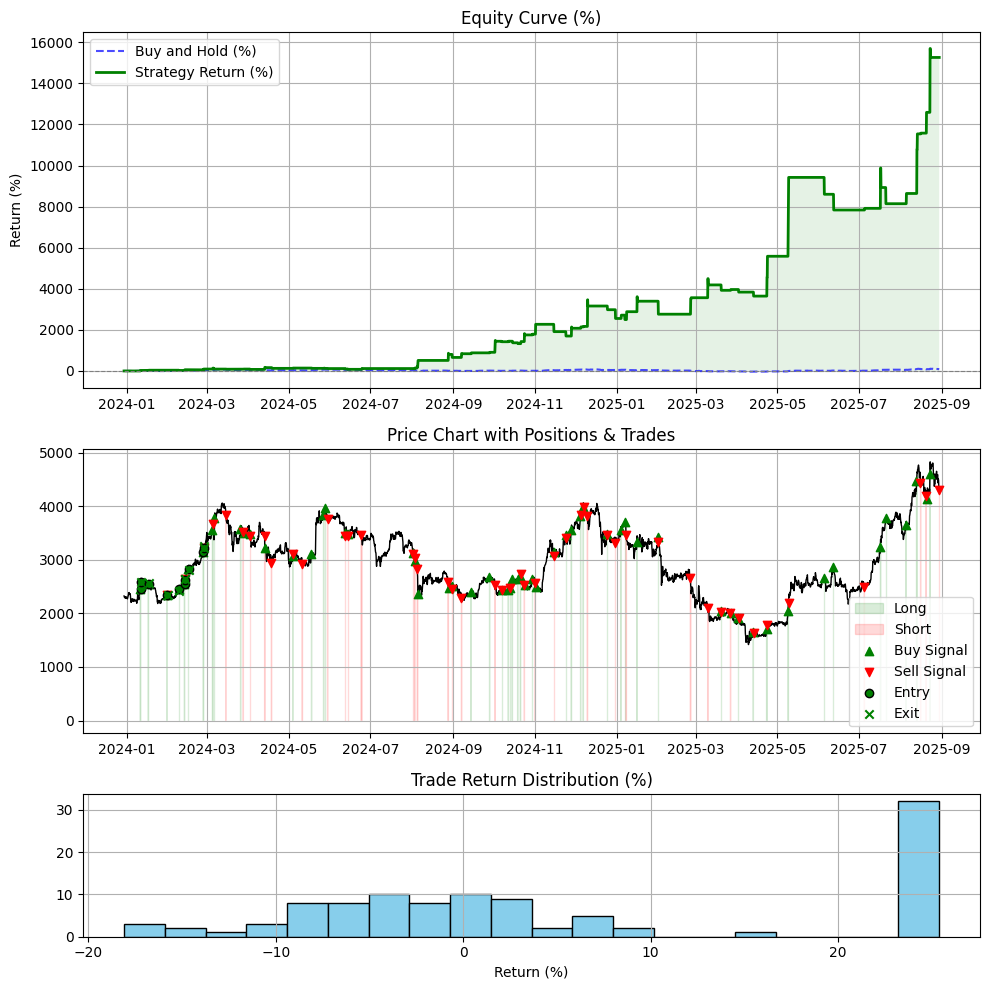

,timestamp,signal,close,reason
7013,2025-08-05 08:00:00+08:00,-1,3680.380000,多單平倉
7104,2025-08-12 22:00:00+08:00,1,4472.620000,多單進場
7111,2025-08-13 12:00:00+08:00,-1,4632.210000,多單平倉
7140,2025-08-15 22:00:00+08:00,-1,4430.860000,空單進場
7143,2025-08-16 04:00:00+08:00,1,4428.830000,空單平倉
7188,2025-08-19 22:00:00+08:00,-1,4192.140000,空單進場
7194,2025-08-20 10:00:00+08:00,1,4140.920000,空單平倉
7224,2025-08-22 22:00:00+08:00,1,4616.080000,多單進場
7229,2025-08-23 08:00:00+08:00,-1,4780.590000,多單平倉
7308,2025-08-29 22:00:00+08:00,-1,4301.600000,空單進場


In [1]:
import warnings 
warnings.filterwarnings('ignore')
from Technicalindicatorstrategy import vegas,turtle_strategy,macd,turtle_strategy_filter,bbrank,TurtleMACDTimeZoneFilter
from Backtest.backtest import backtest_signals
from Plot.plot import display_trades_log_as_html,plot_backtest_result
from IPython.display import HTML
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = TurtleMACDTimeZoneFilter.get_signals('ETHUSDT','2h',datetime.now(),7309,atr_period=14,fast_period=14,slow_period=25,signal_period=15,high_low_lookback=22,atr_multiplier_sl=2.9)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 1000000, # 1000台幣
    fee_rate = 0.0000, # 合約手續費
    leverage = 7, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = None,       # 停損閾值，例如0.05代表5%
    take_profit = 0.035,     # 停利閾值
    capital_ratio = 1, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False,
    risk_free_rate=0
    )  
display(pd.DataFrame(result['Overview performance'],index=['Overview performance']))
display(pd.DataFrame(result['Trades analysis'],index=['Trades analysis']))
display(pd.DataFrame(result['Risk/performance ratios'],index=['Risk/performance ratios']))
html_output = display_trades_log_as_html(result['trades_log'][-10:])
plot_backtest_result(result)
display(HTML(html_output))
display(df_signals.loc[df_signals['signal']!=0,['timestamp','signal','close',"reason"]].tail(10).style.background_gradient())